<a href="https://colab.research.google.com/github/BAlshowaikh/ML-Projects/blob/main/TimeSeriesAndBitcoinProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intorduction to Time Series and Bitcoin Project

In [ ]:
# Check the GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b05f200d-2b4b-947e-d397-01c6e6c99675)


#Get the data

In [ ]:
# Download the Bitcoin historical data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-08-26 19:48:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-08-26 19:48:06 (9.29 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Import the data using pandas
import pandas as pd

# Convert (Or parse) the date column into a datetime format (it's in a string format)
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"], #Convert this column to date format
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
# How many samples we have?
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


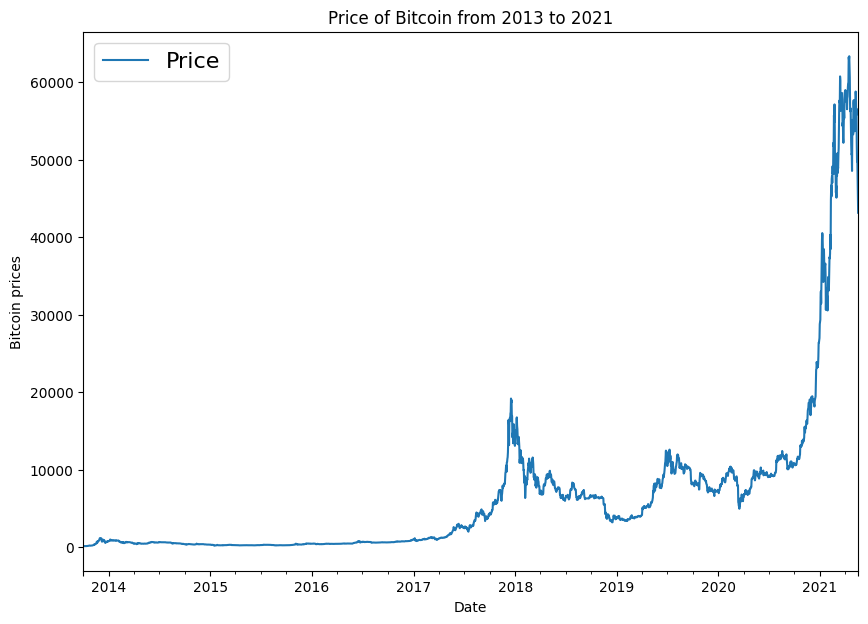

In [ ]:
# Plot the prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("Bitcoin prices")
plt.title("Price of Bitcoin from 2013 to 2021")
plt.legend(fontsize=16)

#Import the data with Python CSV module

In [ ]:
# Importing teh data using python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # Skip the first line (gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # Convert the dates from string into date format
    btc_price.append(float(line[2])) # Get the closing prices as float

In [ ]:
# Check the timestpes and btc_price arrays
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
# Check the length of the arrays
len(timesteps), len(btc_price)

(2787, 2787)

Text(0.5, 1.0, 'Bitcoin prices from 2013 to 2021')

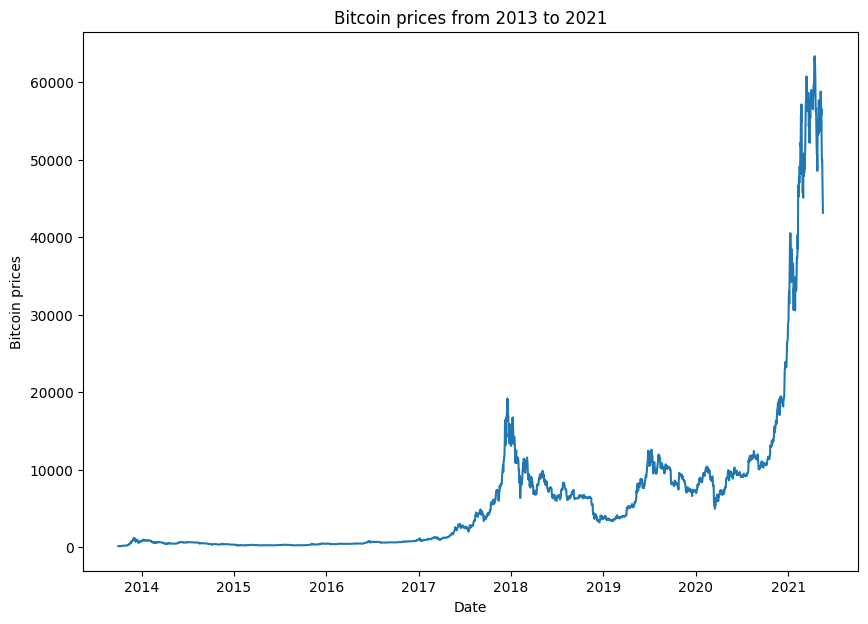

In [ ]:
# Plot the CSV
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("Bitcoin prices")
plt.xlabel("Date")
plt.title("Bitcoin prices from 2013 to 2021")

#Format Data Part 1: Creating train and test sets

> There are two ways to do so (one wrong and the other correct)
* **The wrong way**: Using the `train_test_split`.
Why it's wrong?
We want to predict the price of the Bitcoin in the future depending on the previous prioces, this methodology doesn't provide that as the test data is spread out all through the dara so
Our test data is scattered all throughout the training data (Becuase it will randomly split the data into training and test)
* **The correct way**: Craete an abitrary point in time to split our data, **everythng befor this point is considered as train data** and **everything after it is considered to be as a test data**.

In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
# The bitcoin price is a dataframe which has two columns
# We want to spilt the columns and convert them into numbers
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
# Check the timesteps and prices
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Create train and test splits
split_size = int(0.8 * len(prices)) # Split by 80%, 20%
split_size

# Create a train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create a test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

# Check the length of the splits
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

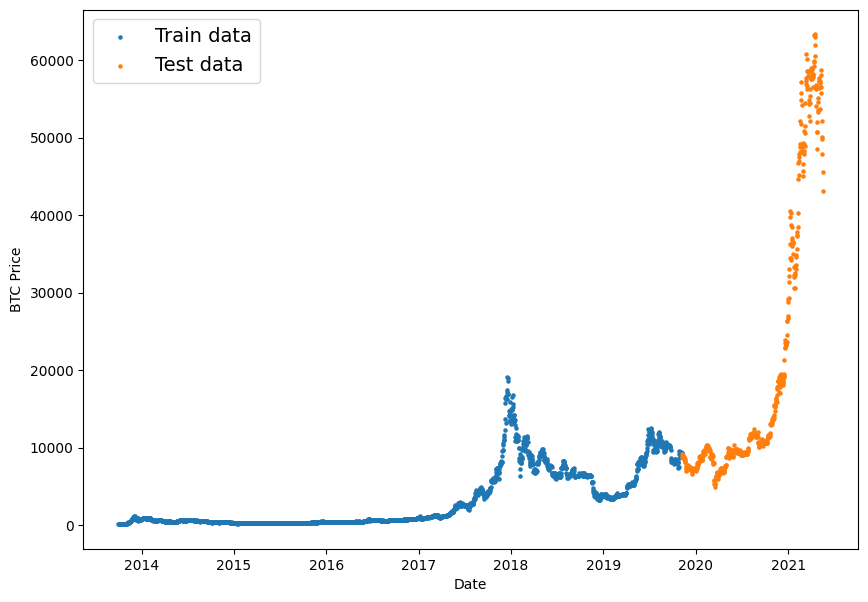

In [ ]:
#n Plot the train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

##Create a plot function

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
    Plot the timesteps and the corresponding values
    ------
    Parameters:
    timestpes: Array ot timesteps (Date and time)
    values: Array of values (Bitcoin prices)
    format: Style of plot
    start: Where to start the plot
    end: where to end the plot
    label: label to show on the plot
  """

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

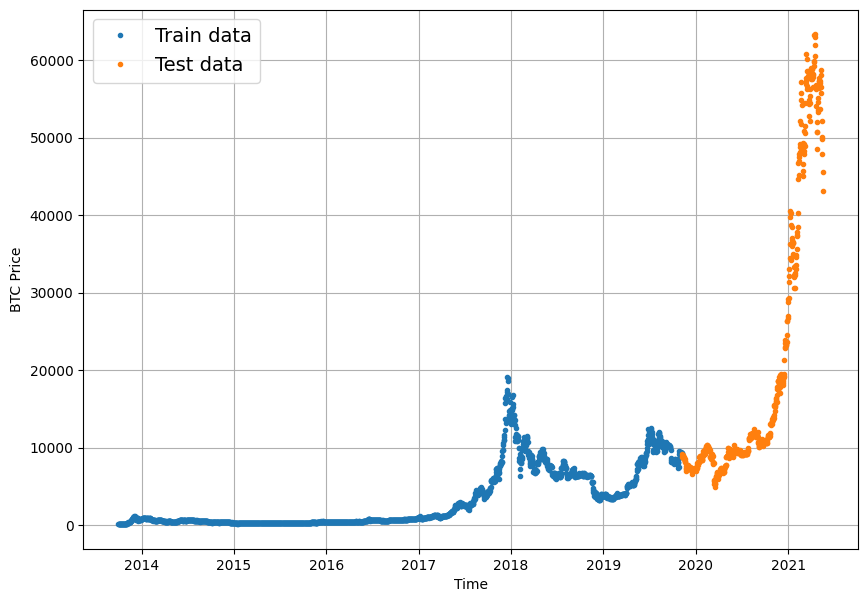

In [ ]:
# Check the plot function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Models

> We'll try different kind of experiments here is a breakdown:
* Model 0 : Naive model (Baseline)
* Model 1 : Dense model (Horizon=1, Window=7)
* Model 2 : Dense model (Horizion=1, window=30)
* Model 3 : Dense model (Horizion=7, window=30)
* Model 4 : Conv1D (Horizon=1, Window=7)
* Model 5 : LSTM (Horizon=1, Window=7)
* Model 6 : Same as model 1 but with multivariate data
* Model 7 : N-BEATs algorithm
* Model 8 : Ensemble (multiple models optimized on different loss functions)
* Model 9: Future prediction model (model to predict future values)
* Model 10 : Same as 1 (but with turkey 🦃 data introduced)

#Model 0 : Naive model (Baseline)

> This model will basically use teh previous timestep value to predict teh next timestep value


In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1] # It's equal to all the arry except the last value
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

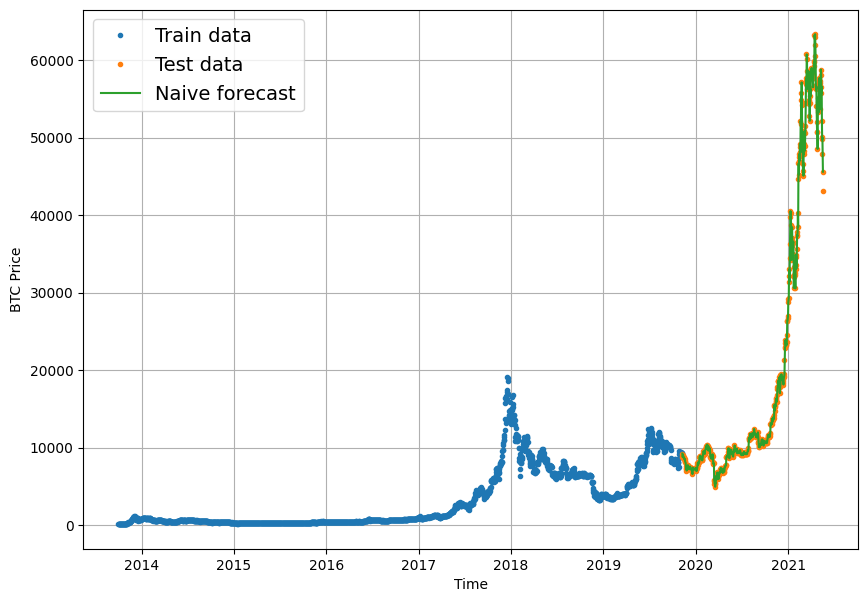

In [ ]:
# Plot the naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

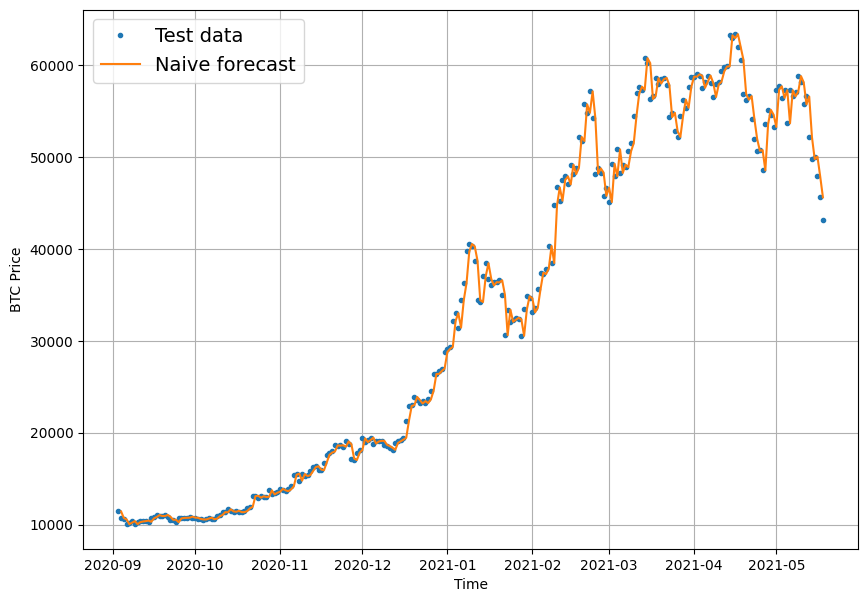

In [ ]:
# Zoom a little bit
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, start=300, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=300, label="Naive forecast");

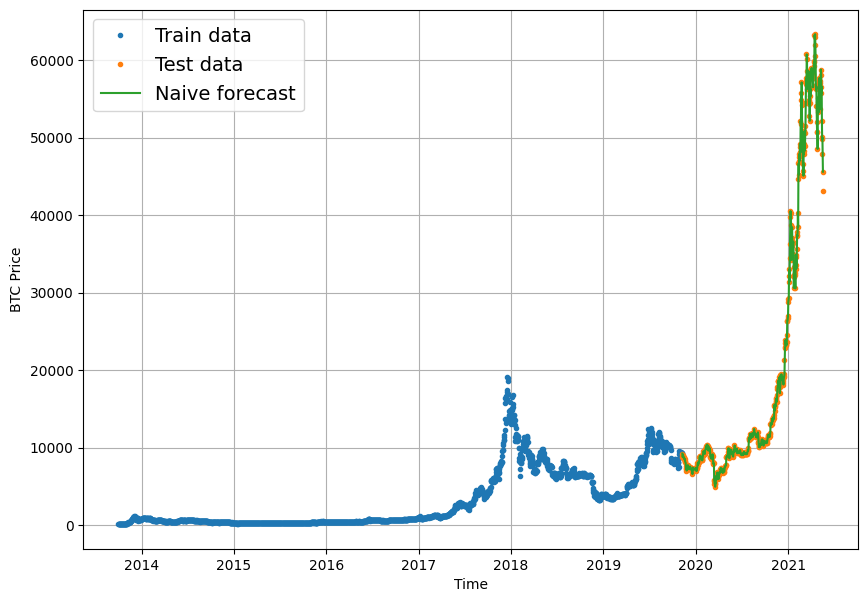

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

#Create an evaluation function

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true, y_pred)
  mse = tf.keras.metrics.MeanSquaredError() # puts and emphasis on outliers (all errors get squared)
  mse.update_state(y_true, y_pred)
  rmse = tf.sqrt(mse.result())
  mape = tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.result().numpy(),
          "mse": mse.result().numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.result().numpy(),
          "mase": mase.numpy()}

##Calculate naive results

In [ ]:
y_test[1:].shape, naive_forecast.shape

((557,), (557,))

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

# Format data part 2 : Windoiwng dataset

In [ ]:
HORIZON = 1 # Predict 1 step at a time
WINDOW_SIZE = 7 #Look back 7 previous days

In [ ]:
# Create function ro label windowd data
def get_labelled_windows(x, horizon=1):
  """
  Creates label for windowed data

  E.g. if horizon=1
  Input: [1,2,3,4,5,6] -> Output: ([1,2,3,4,5], [6])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


> Create a function to convert the entire data into a windows, the function will:
* Creates a window step of specific sindow size e.x. [[0,1,2,3,4,5,6,7]]
* Uses numpy indexing to create 2D of multiple window step
[[0,1,2,3,4,5,6,7],
 [1,2,3,4,5,6,7,8],
 [2,3,4,5,6,7,8,9]]
* Uses the 2D array of multuple window steps to index on a target series.
* Uses the `get_labelled_windows()` function to turn the window steps into windows.



In [ ]:
import numpy as np
# Create function to view numpy arrays into windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a ID array into a 2D array of sequential windows of window_size.
  """

  # 1.Create a window of specific window_size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps
  window_indexs = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array with 2D array of multiple window steps
  windowed_array = x[window_indexs]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


##Turning windows into training and test sets

> We could have windowed our existing training and test splits but it usually better to window the data first then split it into training and test sets.


In [ ]:
# Make a train and test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows)*(1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# View the first 5 samples of training windows and labels
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Create a checkpoint

> It will monitor the model's performance during training and save the best epoch that the model has the best performance in it.

In [ ]:
import os
# Create a checkpoint function
def create_model_checkpoint(model_name, save_path="model_experiments"):
   return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".model.keras"),
                                                  monitor="val_loss",
                                                  verbose=0,
                                                  save_best_only=True)

#Create model 1 : Dense model (window=7, horizon=1)

> * A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
Batch size of 128
100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Create the model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - loss: 2304.5674 - mae: 2304.5674 - val_loss: 1626.4481 - val_mae: 1626.4481
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 335.6402 - mae: 335.6402 - val_loss: 1450.3704 - val_mae: 1450.3704
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 234.9261 - mae: 234.9261 - val_loss: 1065.8035 - val_mae: 1065.8035
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 186.7973 - mae: 186.7973 - val_loss: 1052.0726 - val_mae: 1052.0726
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 180.6255 - mae: 180.6255 - val_loss: 1056.9713 - val_mae: 1056.9713
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 176.8899 - mae: 176.8899 - val_loss: 1036.9963 - val_mae: 1036.9963
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 173.2540 - mae: 173.2540 - val_loss: 1011.6843 - val_mae: 1011.6843
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 169.5408 - mae: 169.5408 - val_loss: 982.4

In [ ]:
# Evaluate the model
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 292.1038 - mae: 292.1038


[584.0587768554688, 584.0587768554688]

In [ ]:
# Load in the saved model which performs the best result
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense.model.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 285.0465 - mae: 285.0465


[568.5776977539062, 568.5776977539062]

##Making forecasts

> We'll create a function which:
* Take a trained model
* Take an input data
* Pass the input into the `predict()` function
* Return the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Takes a trained model and some input data then make predictions.
  """

  model_preds = model.predict(input_data)
  return tf.squeeze(model_preds) # Return 1D array

In [ ]:
# Test the function
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


(556,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([8853.811 , 8790.4375, 9060.964 , 8760.926 , 8735.757 ],
       dtype=float32)>)

##Evaluate model_1

In [ ]:
# Evaluate the model's results
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.5777,
 'mse': 1159132.4,
 'rmse': 1076.6301,
 'mape': 2.5564508,
 'mase': 0.99883354}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

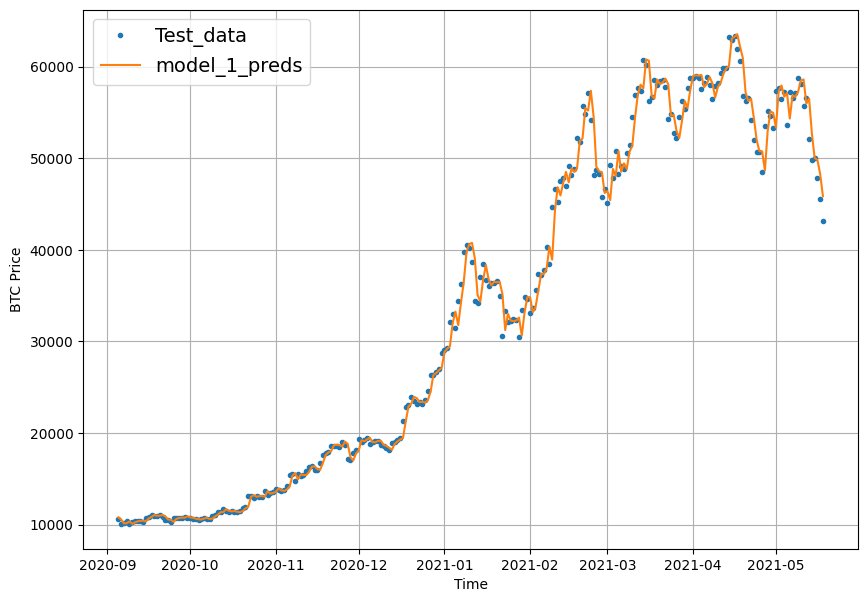

In [ ]:
# Plot the results
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, format="-",
                 label="model_1_preds")